<a href = "https://www.pieriantraining.com"><img src="../PT Centered Purple.png"> </a>

<em style="text-align:center">Copyrighted by Pierian Training</em>

# MultiVariate Time Series Forecasting - Past Covariates

An past covariates means you have extra data from history beyond the target, but don't know what that data will be in the future. For example , knowing historical humidty patterns and trying to predict a target column of precipitation, but not knowing future humidity values.

## Imports

In [20]:
from autogluon.timeseries import TimeSeriesDataFrame,TimeSeriesPredictor
import pandas as pd

## Data Set

Let's forecast CO air quality with multiple past covariants. Our dataset:

Our Target will be:
    * pollution:  (Particulate Matter (PM2.5)) concentration

Our Features Are:
* dew: Dew Point
* temp: Temperature
* press: Pressure
* wnd_spd: Cumulated wind speed
* Snow: Cumulated hours of snow
* Rain: Cumulated hours of rain


In [77]:
df = pd.read_csv('data/one_year_air_pollution.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8760 non-null   object 
 1   pollution  8760 non-null   float64
 2   dew        8760 non-null   int64  
 3   temp       8760 non-null   float64
 4   press      8760 non-null   float64
 5   wnd_spd    8760 non-null   float64
 6   snow       8760 non-null   int64  
 7   rain       8760 non-null   int64  
 8   item_id    8760 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 616.1+ KB


In [79]:
df.tail()

,timestamp,pollution,dew,temp,press,wnd_spd,snow,rain,item_id
8755,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,PM2.5 Air Pollution
8756,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,PM2.5 Air Pollution
8757,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,PM2.5 Air Pollution
8758,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,PM2.5 Air Pollution
8759,2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,249.85,0,0,PM2.5 Air Pollution


In [80]:
df.head()

,timestamp,pollution,dew,temp,press,wnd_spd,snow,rain,item_id
0,2014-01-01 00:00:00,24.0,-20,7.0,1014.0,143.48,0,0,PM2.5 Air Pollution
1,2014-01-01 01:00:00,53.0,-20,7.0,1013.0,147.50,0,0,PM2.5 Air Pollution
2,2014-01-01 02:00:00,65.0,-20,6.0,1013.0,151.52,0,0,PM2.5 Air Pollution
3,2014-01-01 03:00:00,70.0,-20,6.0,1013.0,153.31,0,0,PM2.5 Air Pollution
4,2014-01-01 04:00:00,79.0,-18,3.0,1012.0,0.89,0,0,PM2.5 Air Pollution


### TimeSeriesDataFrame

In [81]:
train_data = TimeSeriesDataFrame('data/one_year_air_pollution.csv')

In [82]:
train_data

pollution  dew  temp   press  \
item_id             timestamp                                           
PM2.5 Air Pollution 2014-01-01 00:00:00       24.0  -20   7.0  1014.0   
                    2014-01-01 01:00:00       53.0  -20   7.0  1013.0   
                    2014-01-01 02:00:00       65.0  -20   6.0  1013.0   
                    2014-01-01 03:00:00       70.0  -20   6.0  1013.0   
                    2014-01-01 04:00:00       79.0  -18   3.0  1012.0   
...                                            ...  ...   ...     ...   
                    2014-12-31 19:00:00        8.0  -23  -2.0  1034.0   
                    2014-12-31 20:00:00       10.0  -22  -3.0  1034.0   
                    2014-12-31 21:00:00       10.0  -22  -3.0  1034.0   
                    2014-12-31 22:00:00        8.0  -22  -4.0  1034.0   
                    2014-12-31 23:00:00       12.0  -21  -3.0  1034.0   

                                         wnd_spd  snow  rain  
item_id             timestamp                                 
PM2.5 Air Pollution 2014-01-01 00:00:00   143.48     0     0  
                    2014-01-01 01:00:00   147.50     0     0  
                    2014-01-01 02:00:00   151.52     0     0  
                    2014-01-01 03:00:00   153.31     0     0  
                    2014-01-01 04:00:00     0.89     0     0  
...                                          ...   ...   ...  
                    2014-12-31 19:00:00   231.97     0     0  
                    2014-12-31 20:00:00   237.78     0     0  
                    2014-12-31 21:00:00   242.70     0     0  
                    2014-12-31 22:00:00   246.72     0     0  
                    2014-12-31 23:00:00   249.85     0     0  

[8760 rows x 7 columns]

In [83]:
train_data.columns

Index(['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain'], dtype='object')

## Predictor Object

Let's forecast one week of pollution from 1 year of data. Past Covariates are automatically detected for any column that is not the "target" column:

In [86]:
predictor = TimeSeriesPredictor(
    prediction_length=24*7,
    target="pollution",
    ) 

In [87]:
predictor.fit(train_data)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 168,
 'random_seed': None,
 'target': 'pollution',
 'time_limit': None}
Provided training data set with 8760 rows, 1 items (item = single time series). Average time series length is 8760.0.
Training artifacts will be saved to: C:\Users\Marcial\Pierian-Data-Courses\AutoGluon-Course\02-Time-Series-Forecasting\AutogluonModels\ag-20230403_220608
AutoGluon will save models to AutogluonModels\ag-20230403_220608\
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'pollution'
	past covariates:  ['dew

# Predictions

In [88]:
predictions = predictor.predict(train_data)

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [89]:
predictions

mean        0.1        0.2  \
item_id             timestamp                                              
PM2.5 Air Pollution 2015-01-01 00:00:00  40.906535   2.858353  11.333192   
                    2015-01-01 01:00:00  40.757190  -0.287354   9.236415   
                    2015-01-01 02:00:00  39.552024  -3.837704   6.496093   
                    2015-01-01 03:00:00  40.801751  -4.768487   6.209025   
                    2015-01-01 04:00:00  47.718728   0.039138  11.914220   
...                                            ...        ...        ...   
                    2015-01-07 19:00:00  93.347645 -42.285510  -0.672230   
                    2015-01-07 20:00:00  90.052633 -45.196643  -5.035013   
                    2015-01-07 21:00:00  85.630651 -48.915125  -8.078813   
                    2015-01-07 22:00:00  86.290176 -49.181004  -7.323085   
                    2015-01-07 23:00:00  90.620854 -45.624517  -5.166606   

                                               0.3        0.4        0.5  \
item_id             timestamp                                              
PM2.5 Air Pollution 2015-01-01 00:00:00  18.808811  26.761754  35.342453   
                    2015-01-01 01:00:00  17.403893  26.090394  35.237091   
                    2015-01-01 02:00:00  15.222551  24.310943  33.894909   
                    2015-01-01 03:00:00  15.475305  25.118356  35.204762   
                    2015-01-01 04:00:00  21.731642  31.714240  42.154834   
...                                            ...        ...        ...   
                    2015-01-07 19:00:00  30.349813  58.078211  85.560507   
                    2015-01-07 20:00:00  25.840645  54.012324  81.749001   
                    2015-01-07 21:00:00  21.987341  50.788133  78.241996   
                    2015-01-07 22:00:00  23.120720  50.805327  78.354887   
                    2015-01-07 23:00:00  25.155298  54.775412  82.278593   

                                                0.6         0.7         0.8  \
item_id             timestamp                                                 
PM2.5 Air Pollution 2015-01-01 00:00:00   44.391336   55.398473   68.674613   
                    2015-01-01 01:00:00   44.847379   56.524352   70.567945   
                    2015-01-01 02:00:00   44.106886   56.277974   70.898513   
                    2015-01-01 03:00:00   45.730681   58.405628   73.565247   
                    2015-01-01 04:00:00   53.049073   66.123224   81.689722   
...                                             ...         ...         ...   
                    2015-01-07 19:00:00  113.917422  146.307845  183.997512   
                    2015-01-07 20:00:00  111.051196  143.787087  182.459883   
                    2015-01-07 21:00:00  106.956197  138.949268  176.161358   
                    2015-01-07 22:00:00  106.632361  140.375163  178.777772   
                    2015-01-07 23:00:00  110.008879  142.124407  179.972411   

                                                0.9  
item_id             timestamp                        
PM2.5 Air Pollution 2015-01-01 00:00:00   87.105937  
                    2015-01-01 01:00:00   90.232657  
                    2015-01-01 02:00:00   91.169319  
                    2015-01-01 03:00:00   94.635873  
                    2015-01-01 04:00:00  103.439710  
...                                             ...  
                    2015-01-07 19:00:00  237.556198  
                    2015-01-07 20:00:00  237.020964  
                    2015-01-07 21:00:00  229.221793  
                    2015-01-07 22:00:00  232.484416  
                    2015-01-07 23:00:00  232.875269  

[168 rows x 10 columns]

## Visualize Predictions

In [90]:
import matplotlib.pyplot as plt

In [95]:
def plot_predictions(train_data,predictions,item_id,target_col):
    plt.figure(figsize=(20, 3),dpi=150)
    # Y PREDICTIONS
    y_pred = predictions.loc[item_id] 
    # HISTORICAL Y VALUES
    y_past = train_data.loc[item_id][target_col] 
    
    # PLOT HISTORICAL VALUES AGAINST BEST MODEL'S PREDICTIONS
    plt.plot(y_past, label="Known Past Historical Values")
    plt.plot(y_pred["mean"], label="Mean Forecast")
    
    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
    )

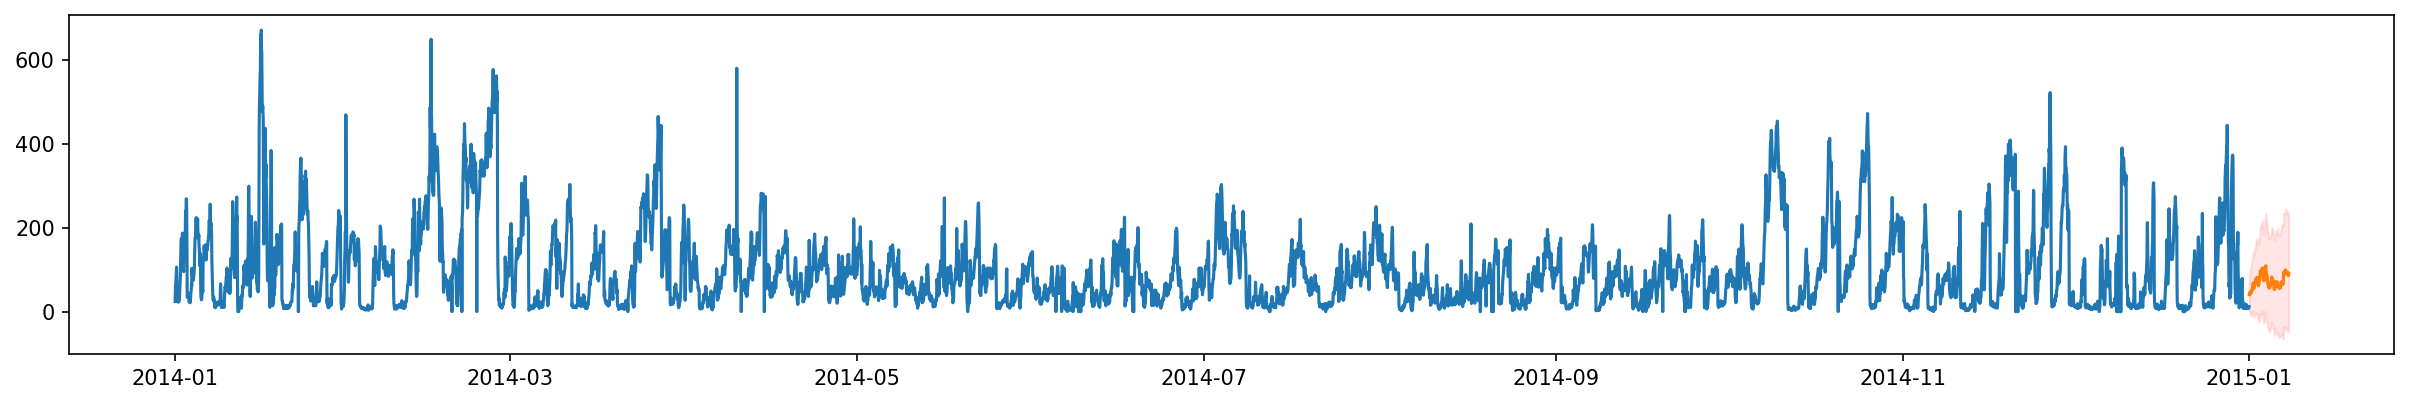

In [96]:
plot_predictions(train_data=train_data,predictions=predictions,item_id='PM2.5 Air Pollution',target_col='pollution')